<a href="https://colab.research.google.com/github/ruperty/colab/blob/master/simple_conv2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ruperty/pct.git

Cloning into 'pct'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 529 (delta 26), reused 31 (delta 14), pack-reused 481
Receiving objects: 100% (529/529), 178.57 KiB | 5.10 MiB/s, done.
Resolving deltas: 100% (314/314), done.


In [2]:
import pct.dl.utils as ut
import numpy as np
import time
from tensorflow import keras
from pathlib import Path
from os import path
#from keras.preprocessing.image import load_img
import IPython.display as display

In [3]:
CONV_SIZE=5
IMG_ROWS, IMG_COLS = CONV_SIZE, CONV_SIZE # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
model_name="SingleC2D"
model_plot_filename="C2D.png"
show_shapes=True

In [4]:
def transform_weights(wts):
    main_list=[]
    for wtss in wts:
        #print(wtss)
        sub_list=[]
        for wtsss in wtss:
            #print("wtss", wtsss[0][0])
            sub_list.append(wtsss[0][0])
            
        main_list.append(sub_list)
    return np.asarray(main_list)

In [5]:
def create_model():
    sub_image = keras.layers.Input(shape=INPUT_SHAPE, name="image")
    c2d=keras.layers.Conv2D(1, (CONV_SIZE, CONV_SIZE), strides=(2, 2), use_bias=False, name="C2D")(sub_image)
    model = keras.models.Model(inputs=sub_image, outputs=c2d, name=model_name)   
    return model

In [6]:
model=create_model()
model.summary()
#keras.utils.plot_model(model, model_plot_filename, show_shapes=show_shapes) 

Model: "SingleC2D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 5, 5, 1)]         0         
_________________________________________________________________
C2D (Conv2D)                 (None, 1, 1, 1)           25        
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [16]:
wts = model.get_weights()
wtsz = transform_weights(wts[0])
initial_wtsz=wtsz
print(wtsz)

[[-0.20807724 -0.1573267  -0.25811815 -0.14188787 -0.21256298]
 [-0.31289595  0.1557067   0.24897265  0.3094712   0.0887655 ]
 [ 0.34408027 -0.33411124 -0.2024832  -0.341563    0.12254927]
 [-0.09116137 -0.16255684  0.33805454 -0.02194118  0.08368444]
 [-0.2260269  -0.10819089  0.19243681  0.01116386  0.05784911]]


None (400, 400) L


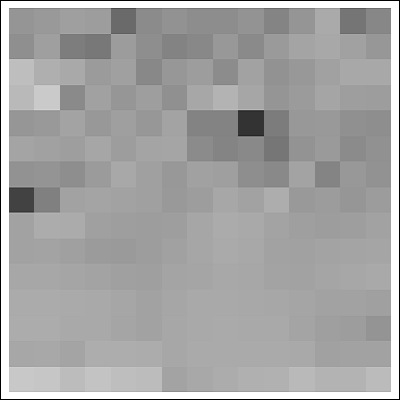

In [17]:
# input data
file_to_open = "pct/data/grey-boxes.png" 
gimg = ut.GreyImage(file_to_open)
gimg.open()
img = gimg.getImage()
# show the image
display.display(img)



In [18]:
left = 57
top = 97
right = left+CONV_SIZE
bottom = top+CONV_SIZE
img1 = img.crop((left, top, right, bottom)) 
img1=img1.convert('L')

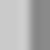

In [19]:
# sub image
# and sub image resized
display.display(img1)
display.display(img1.resize((50,50)))

In [20]:
imageArray =np.asarray(img1)/255
print(imageArray)

[[0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]]


In [21]:
import tensorflow as tf
reference = 9
batch_size = 500
X = tf.constant(np.array([imageArray]), dtype=tf.float32 )
Y = tf.constant(np.full((1,), reference), dtype=tf.float32 )
dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
dataset = dataset.shuffle( 1 ).repeat( 1 ).batch( batch_size )
iterator = dataset.__iter__()
inputs , outputs = iterator.get_next()

In [22]:
print(inputs, outputs)

tf.Tensor(
[[[0.7921569 0.7921569 0.7921569 0.5411765 0.5411765]
  [0.7921569 0.7921569 0.7921569 0.5411765 0.5411765]
  [0.7921569 0.7921569 0.7921569 0.5411765 0.5411765]
  [0.7921569 0.7921569 0.7921569 0.5411765 0.5411765]
  [0.7921569 0.7921569 0.7921569 0.5411765 0.5411765]]], shape=(1, 5, 5), dtype=float32) tf.Tensor([9.], shape=(1,), dtype=float32)


In [23]:
learning_rate=0.003
model.compile(keras.optimizers.SGD(learning_rate), loss='mse', run_eagerly=True)

In [24]:
from plotly.subplots import make_subplots
spfig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}]])

spfig.add_trace(
    go.Surface(z=imageArray,  showscale=False),
    row=1, col=1)


spfig.add_trace(
    go.Surface(z=wtsz),
    row=1, col=2)

spfig.update_layout(
    title_text='Sub-image and Weights',
    height=600,
    width=900
)

spf1 = go.FigureWidget(spfig)
spf1.show()


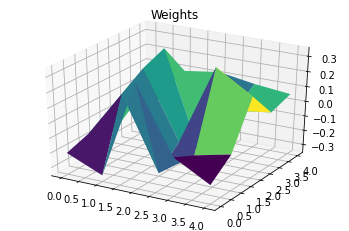

In [70]:
"""
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=wtsz)])
fig.update_layout(title='Weights', autosize=False,
                  width=750, height=750, margin=dict(l=65, r=50, b=65, t=90))
print(fig.data)
print(fig)
#fig.show()
"""
import matplotlib.pyplot as plt
x = np.outer(np.linspace(0, CONV_SIZE-1, CONV_SIZE), np.ones(CONV_SIZE))
#print(x)
y = x.copy().T
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Weights')
surface = ax.plot_surface(x,y,wtsz, cmap='viridis', edgecolor='none')
plot = [surface]
#print(surface)


In [74]:
def animate(steps):
      history = model.fit(inputs, outputs, epochs=1, verbose=False)
      loss = history.history['loss'][-1]
      out = model(inputs).numpy()[0][0][0][0]
      #if steps % 5 == 0 :
      #  print('[{:3d} {:5.2f} {:4.2f}]'.format(steps, loss, out), end=" ")
      wts = model.get_weights()
      wtsz = transform_weights(wts[0])
      #print(wtsz)
      plot[0].remove()      
      plot[0] = ax.plot_surface(x,y,wtsz, cmap='viridis', edgecolor='none')
      #fig.data[0].z=wtsz
      return (plot[0],)

In [77]:
from matplotlib import animation
print("Target output is", reference)
anim = animation.FuncAnimation(fig, animate, interval=100, frames=100, blit=True)
plt.show()

Target output is 9


In [78]:
from IPython.display import HTML
HTML(anim.to_jshtml())

In [79]:
print(imageArray)
wts = model.get_weights()
wtsz = transform_weights(wts[0])
print("Final weights")
print(wtsz)
print("sum", np.sum(wtsz))
print("Initial weights")
print(initial_wtsz)
print("sum", np.sum(initial_wtsz))

[[0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]
 [0.79215686 0.79215686 0.79215686 0.54117647 0.54117647]]
Final weights
[[0.41089597 0.46164653 0.36085504 0.28097507 0.21030132]
 [0.3060772  0.7746796  0.86794555 0.73233366 0.511628  ]
 [0.96305317 0.28486192 0.41649002 0.08130153 0.54541177]
 [0.5278115  0.45641637 0.95702744 0.4009218  0.5065469 ]
 [0.39294633 0.510782   0.8114097  0.4340268  0.48071206]]
sum 12.6870575
Initial weights
[[-0.20807724 -0.1573267  -0.25811815 -0.14188787 -0.21256298]
 [-0.31289595  0.1557067   0.24897265  0.3094712   0.0887655 ]
 [ 0.34408027 -0.33411124 -0.2024832  -0.341563    0.12254927]
 [-0.09116137 -0.16255684  0.33805454 -0.02194118  0.08368444]
 [-0.2260269  -0.10819089  0.19243681  0.01116386  0.05784911]]
sum -0.82616925
